

## My First Kaggle Project: Titanic
### by Rima-- Data Science Foundations Class at https://barcelonatechnologyschool.com/

#### This project was started while taking Data Science Foundations Class at Barcelona Technology School
#### It was started as part of an assignment for the class and to get familiar with Kaggle. 

Data for this notebook can be downloaded here: https://www.kaggle.com/c/titanic/data and this notebook was created on the kaggle.com  Python 3 environment. 

The direct link to this file is: https://www.kaggle.com/rimads/firstkaggleproject-titanic-byrima

   ### Below are some the questions that will be answered in this notebook
*    How many men and women survived?
*    What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
*    Which port of embarkation had most of the survivors? And which less?
*    Which ticket class had most of the survivors? And which less?
*    Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?

In [182]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Before Aswering questions, will need to create dataframes from the 3 csv files in the dataset

In [183]:
# Import train.csv data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [185]:
test= pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [186]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission                           

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## How many men and women survived?

In [187]:
#Below we can calculate the total number survived with the value "1" meaning survived
train.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [188]:
#below is number of men who survived vs. died
#The answer shows that 468 men died and 109 men survived
train.Survived[train.Sex=='male'].value_counts()


0    468
1    109
Name: Survived, dtype: int64

In [189]:
#by percentage 
train.Survived[train.Sex=='male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [190]:
#below is number of females who survived vs. died
#It shows that 233 females survived and 81 died
train.Survived[train.Sex=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [191]:
#by percentage 
train.Survived[train.Sex=='female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

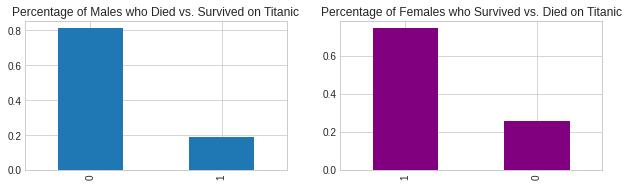

In [192]:
#below is a plot with percentage (by adding normalize=True to show percent)of men who died vs. survived
#It shows that close to 80% of men died and less than 20% of men survived
plt.subplot2grid((2,3), (0,0))
plt.title('Percentage of Males who Died vs. Survived on Titanic')
train.Survived[train.Sex=='male'].value_counts(normalize=True).plot(kind="bar", figsize=(20,10))

#below is a plot with percentage(by adding normalize=True to show percent) of females who survived vs. died
#It shows that over 70% of females survived and less than 30% of femailes died
plt.subplot2grid((2,3), (0,1))
plt.title('Percentage of Females who Survived vs. Died on Titanic')
train.Survived[train.Sex=='female'].value_counts(normalize=True).plot(kind="bar", color='purple', figsize=(16,6))



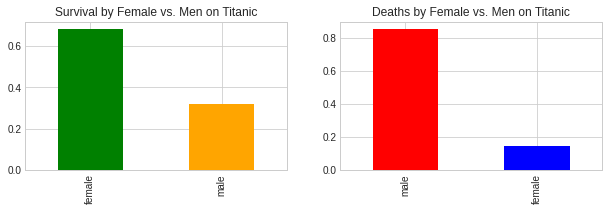

In [193]:

plt.subplot2grid((2,3), (1,0))
plt.title('Survival by Female vs. Men on Titanic')
train.Sex[train.Survived==1].value_counts(normalize=True).plot(kind="bar",  figsize=(16,6), color=['green', 'orange'])


plt.subplot2grid((2,3), (1,1))
plt.title('Deaths by Female vs. Men on Titanic')
train.Sex[train.Survived==0].value_counts(normalize=True).plot(kind="bar",  figsize=(16,6), color=['red', 'blue'])


## CONCLUSION: 

- Number of Males who died: 468 and Number of Males who Survived 109 (81% died and 19% survived)
- Number of Females who died: 233 and Number of Females who Survived (26% died and 74%survived)




##  What was the age group that had a higher survival chance? 
### can Divide age groups in groups of 10 years

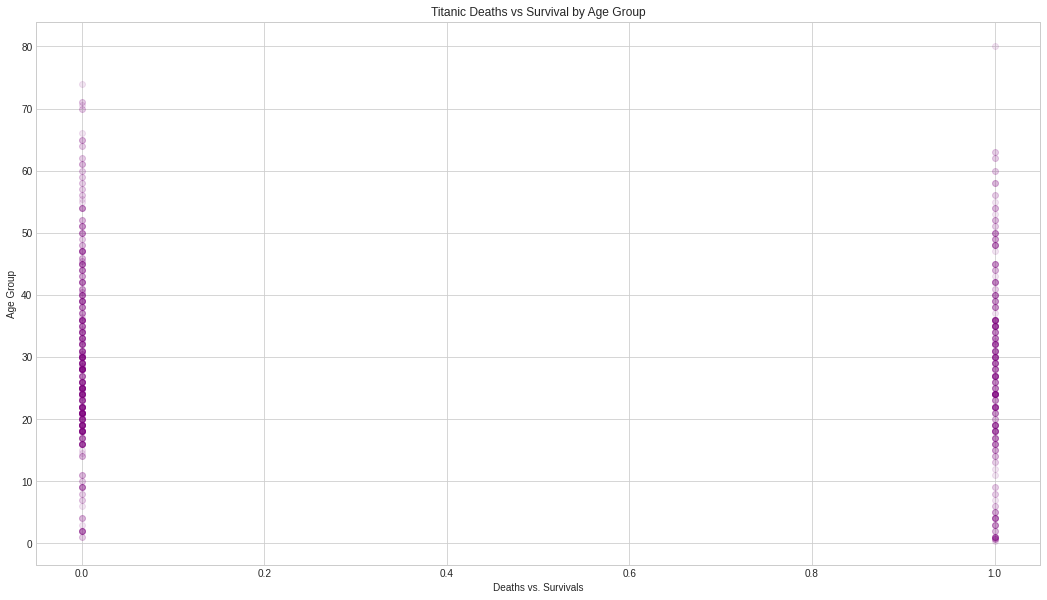

In [194]:
#group by age of surivors
#It shows that there is no major difference between those who survived and those who died
plt.figure(figsize=(18,10))
plt.ylabel("Age Group")
plt.xlabel("Deaths vs. Survivals")
plt.scatter(train.Survived, train.Age, alpha=0.1, color="purple")
plt.title("Titanic Deaths vs Survival by Age Group")
plt.show()

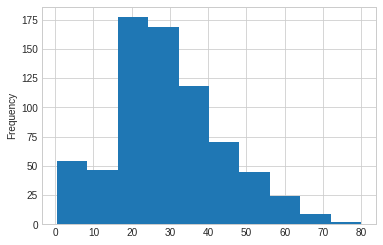

In [195]:
#from the above plot, we can tell that majority of people who  died were between the age of 15-40 a
#and majority of people who survived are around the same age group
#Below is histogram of total age groups on Titanic
#CONCLUSION: 
#The reason we had more people die between the age of 15-40 is because
#most passengers on Titanic were in that age group. 

train.Age.plot.hist()

## Which port of embarkation had most of the survivors? And which less?

In [196]:
#Below are the unique identifiers of ports of embarkation 
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)


### Below is total number of people who embarked from each port and a visual represenation of the port of embarkation for Total number of passengers (whether or not they survived)


S    644
C    168
Q     77
Name: Embarked, dtype: int64

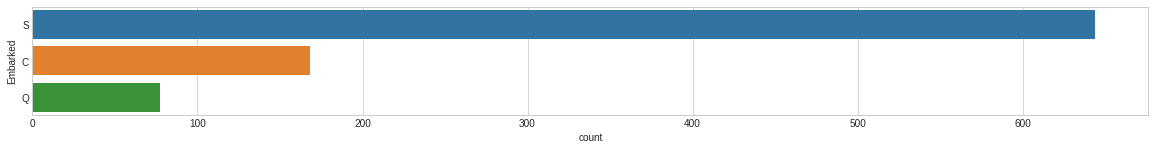

In [197]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Embarked', data=train);
train.Embarked.value_counts()

### Below are the numbers of Survivals and Deaths By Port of Embarkation
#### PORT S, C or Q (the 3 ports in this dataset)


In [198]:
#We can find survivors for each port of embarkation
#First Check Survivors for Port == 'S'
train.Survived[train.Embarked=='S'].value_counts()


0    427
1    217
Name: Survived, dtype: int64

In [199]:
#Check Deaths and Survivals by Percentage
train.Survived[train.Embarked=='S'].value_counts(normalize=True)

0    0.663043
1    0.336957
Name: Survived, dtype: float64

In [200]:

#Check Survivors for Port == 'C'
train.Survived[train.Embarked=='C'].value_counts()

1    93
0    75
Name: Survived, dtype: int64

In [201]:
#Check Survivors for Port == 'C' by percentage
train.Survived[train.Embarked=='C'].value_counts(normalize=True)

1    0.553571
0    0.446429
Name: Survived, dtype: float64

In [202]:

#Check Survivors for Port == 'Q'
train.Survived[train.Embarked=='Q'].value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [203]:

#Check Survivors for Port == 'Q'
train.Survived[train.Embarked=='Q'].value_counts(normalize=True)

0    0.61039
1    0.38961
Name: Survived, dtype: float64

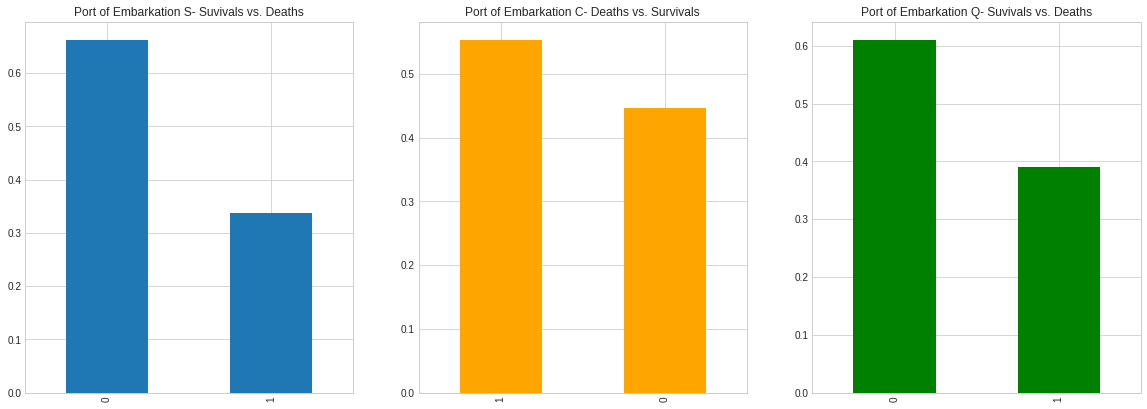

In [204]:

#We can find survivors for each port of embarkation
#First Check Survivors for Port == 'S'
#set up plots next to each other with subgrid with port S at position (0,0)

plt.subplot2grid((2,3), (0,0))
plt.title('Port of Embarkation S- Suvivals vs. Deaths')
train.Survived[train.Embarked=='S'].value_counts(normalize=True).plot(kind="bar", figsize=(20,15))

#We can find survivors for each port of embarkation
#First Check Survivors for Port == 'C'
#set up plots next to each other with subgrid with port C at position (0,1)
plt.subplot2grid((2,3), (0,1))
plt.title('Port of Embarkation C- Deaths vs. Survivals')
train.Survived[train.Embarked=='C'].value_counts(normalize=True).plot(kind="bar", color="orange")

#We can find survivors for each port of embarkation
#First Check Survivors for Port == 'C'
#set up plots next to each other with subgrid with port Q at position (0,2)
plt.subplot2grid((2,3), (0,2))
plt.title('Port of Embarkation Q- Suvivals vs. Deaths')
train.Survived[train.Embarked=='Q'].value_counts(normalize=True).plot(kind="bar", color="green" )

## CONCLUSION: Survivals and Deaths per port


Port S had the most embarkations by far  and for sure it will have the most deaths in numbers. 
Based analysis above for deaths and survivals per port we get:

- Port S: 66% Deaths and 33% Survivals ('0' at 0.663043 and '1' at 0.336957)

- Port C: 55% Survivals and 44% Deaths ('1' at  0.553571 and '0' at 0.446429)

- Port Q: 61% Deaths and 38% Survivals ('0' at 0.61039 and '1' at 0.38961)

### To conclude: Port S had highest percentage of deaths(66%) and Port C had the highest percentage of survivals(55%)

## Which ticket class had most of the survivors? And which less?

In [205]:
#Below are the unique identifiers for ticket classes 
train.Pclass.unique()

array([3, 1, 2])

In [206]:

#Check Survivors for 1st class
train.Survived[train.Pclass==1].value_counts()
    

1    136
0     80
Name: Survived, dtype: int64

In [207]:
#by percentage
train.Survived[train.Pclass==1].value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [208]:
#Survivors for 2nd class
train.Survived[train.Pclass==2].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [209]:
#by percentage
train.Survived[train.Pclass==2].value_counts(normalize=True)

0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [210]:
#Survivors for 3rd class
train.Survived[train.Pclass==3].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [211]:
train.Survived[train.Pclass==3].value_counts(normalize=True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

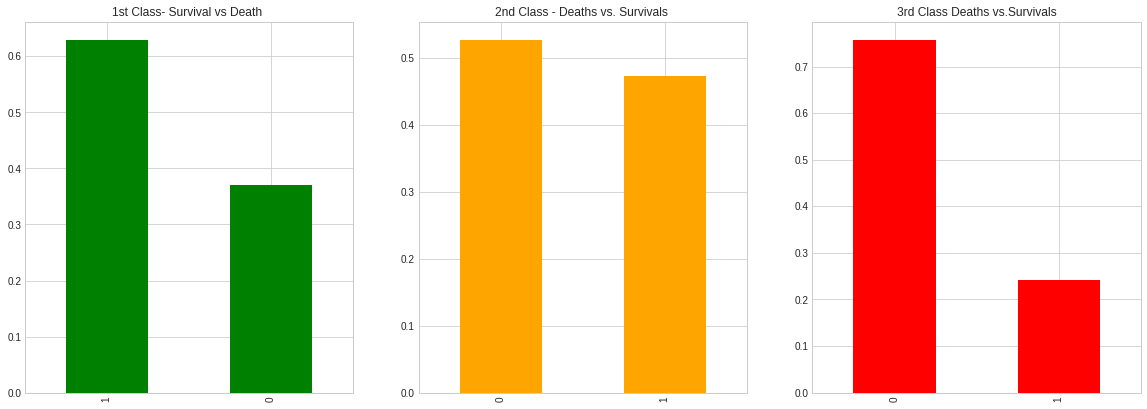

In [212]:



#Check Survivors for 1st class by percentage
plt.subplot2grid((2,3), (0,0))
plt.title('1st Class- Survival vs Death ')
train.Survived[train.Pclass==1].value_counts(normalize=True).plot(kind="bar", figsize=(20,15), color='green')
#Check Survivors for 2nd class by percentage
plt.subplot2grid((2,3), (0,1))
plt.title('2nd Class - Deaths vs. Survivals ')
train.Survived[train.Pclass==2].value_counts(normalize=True).plot(kind="bar", figsize=(20,15), color='orange')
#Check Survivors for 3rd class by percentage
plt.subplot2grid((2,3), (0,2))
plt.title('3rd Class Deaths vs.Survivals')
train.Survived[train.Pclass==3].value_counts(normalize=True).plot(kind="bar", figsize=(20,15), color='red')

## CONCLUSION

- 1st Class : 63% Survived and 37% Died
- 2nd Class : 47% Survived and 53% Died
- 3rd Class : 24% Survived and 76% Died

#### Seems like the higher the ticket class, the less deaths occured!





##  Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?

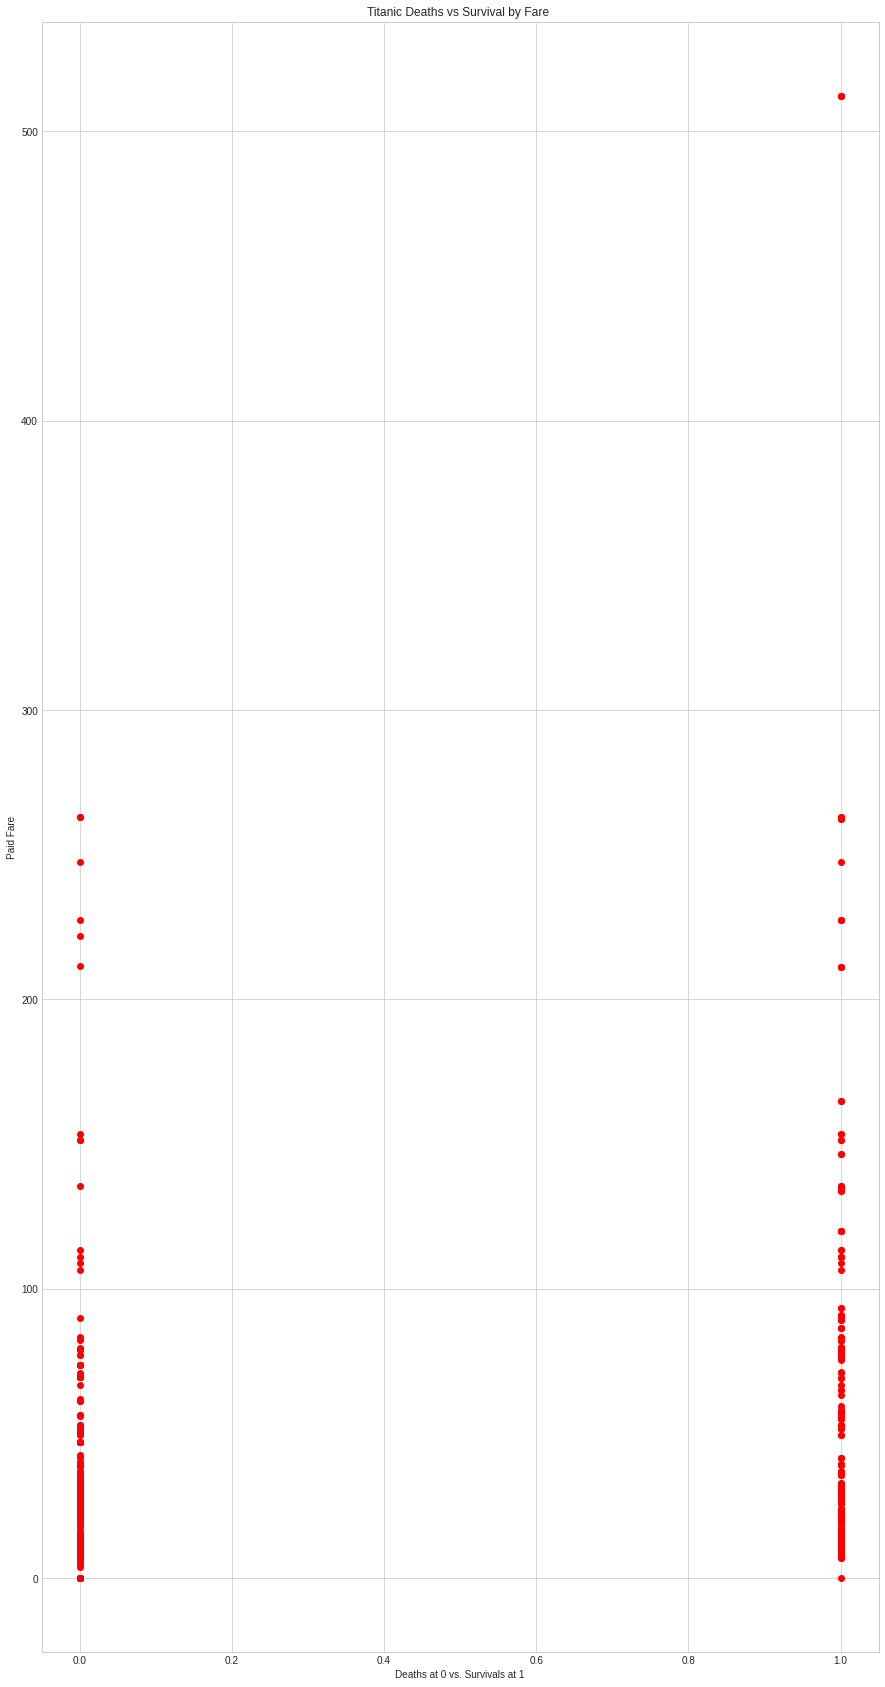

In [213]:
#group by fare of surivors
#It shows difference betweenwho survived and those who paid more
plt.figure(figsize=(15,30))
plt.ylabel("Paid Fare")
plt.xlabel("Deaths at 0 vs. Survivals at 1")
plt.scatter(train.Survived, train.Fare, alpha=1, color="red")
plt.title("Titanic Deaths vs Survival by Fare ")
plt.show()

## CONCLUSION: 
#### Some people who paid a higher fare  seem to have survived more 